# Molecular Visualization with GGMolVis

This notebook provides some basic usage examples of the GGMolVis library.

Currently, they are proof of concept examples and are subject to change (and implement) in the future.

Please refer to the Installation guide for instructions on how to install the library.

In [1]:
import MDAnalysis as mda
from ggmolvis.tests.data import PSF, DCD
from MDAnalysis.analysis.rms import RMSD

import molecularnodes as mn
import numpy as np
import bpy

import ggmolvis
from ggmolvis.ggmolvis import GGMolVis

2024-12-17 16:46:33.362 | DEBUG    | ggmolvis:<module>:50 - Blend file stored at /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/ggmolvis.blend
2024-12-17 16:46:33.411 | DEBUG    | ggmolvis.ggmolvis:__new__:70 - Creating new GGMolVis


In [2]:
print(f'ggmolvis version: {ggmolvis.__version__}')
print(f'ggmolvis path: {ggmolvis.__file__}')
print(f'molecularnodes version: {mn.__file__}')

ggmolvis version: 0.1.0+0.g84c0ca8.dirty
ggmolvis path: /Users/brady/git/ggmolvis/ggmolvis/__init__.py
molecularnodes version: /Users/brady/git/ggmolvis/.venv/lib/python3.11/site-packages/molecularnodes/__init__.py


## Trajectory Visualization

Load the trajectory file by creating a MDAnalysis Universe object.
Replace `PSF` to your own topology file and `DCD` to your own trajectory file.

In [3]:
u = mda.Universe(PSF, DCD)

/Users/brady/git/ggmolvis/.venv/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Initialize the GGMolVis object. It can be thought of as a `Figure` or a canvas for the molecular visualization.

In [4]:
ggmv = GGMolVis()

Select molecular entities of interest to be visualized. Refer to: https://docs.mdanalysis.org/stable/documentation_pages/selections.html for the selection syntax.

In [5]:
residues_ag = u.select_atoms('resid 127 40')
protein_ag = u.select_atoms('protein')

Here we include our molecules into the `GGMolVis` object by calling the `molecule` method.

In [6]:
residue_mol = ggmv.molecule(residues_ag)
protein_mol = ggmv.molecule(protein_ag, style='cartoon')
protein_surface_mol = ggmv.molecule(protein_ag, style='surface', material='transparent')

Render the current frame by calling the `render` method.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp13q2w6h7.PNG
Read blend: "/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/ggmolvis.blend"
Fra:1 Mem:122.28M (Peak 125.70M) | Time:00:02.72 | Rendering 1 / 64 samples
Fra:1 Mem:122.39M (Peak 125.70M) | Time:00:02.94 | Rendering 25 / 64 samples
Fra:1 Mem:122.39M (Peak 125.70M) | Time:00:03.04 | Rendering 50 / 64 samples
Fra:1 Mem:122.46M (Peak 125.70M) | Time:00:03.11 | Rendering 64 / 64 samples
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp13q2w6h7.PNG'
Time: 00:03.23 (Saving: 00:00.09)



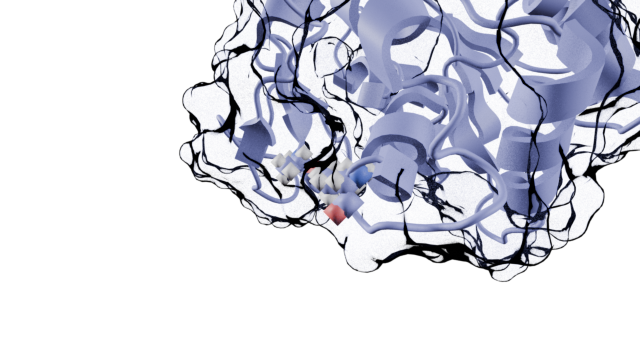

In [7]:
residue_mol.render(engine="EEVEE")

Render the selected frame by calling the `render(frame)` method.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp15qyl288.PNG
Fra:60 Mem:123.47M (Peak 129.96M) | Time:00:00.64 | Rendering 1 / 64 samples
Fra:60 Mem:123.47M (Peak 129.96M) | Time:00:00.77 | Rendering 25 / 64 samples
Fra:60 Mem:123.53M (Peak 129.96M) | Time:00:00.91 | Rendering 50 / 64 samples
Fra:60 Mem:123.47M (Peak 129.96M) | Time:00:01.00 | Rendering 64 / 64 samples
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp15qyl288.PNG'
Time: 00:01.06 (Saving: 00:00.03)



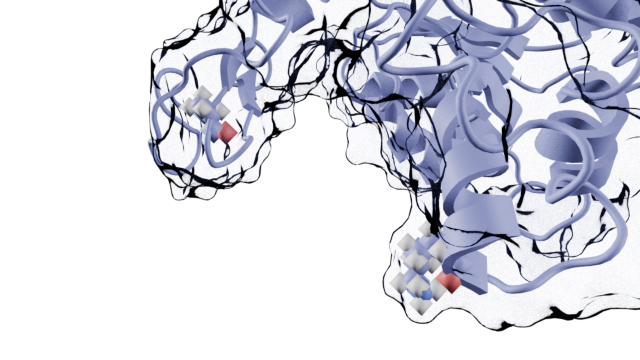

In [8]:
residue_mol.render(frame=60, engine="EEVEE")

You can render the whole trajectory by calling the `.render(mode='movie')` method.

You can change the representation style by calling `set_style` method.

In [9]:
residue_mol.set_style('ball_and_stick')

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpdx0hy3sh.PNG
Fra:60 Mem:130.06M (Peak 136.92M) | Time:00:00.64 | Rendering 1 / 64 samples
Fra:60 Mem:130.06M (Peak 136.92M) | Time:00:00.77 | Rendering 25 / 64 samples
Fra:60 Mem:130.12M (Peak 136.92M) | Time:00:00.91 | Rendering 50 / 64 samples
Fra:60 Mem:130.06M (Peak 136.92M) | Time:00:01.01 | Rendering 64 / 64 samples
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpdx0hy3sh.PNG'
Time: 00:01.07 (Saving: 00:00.03)



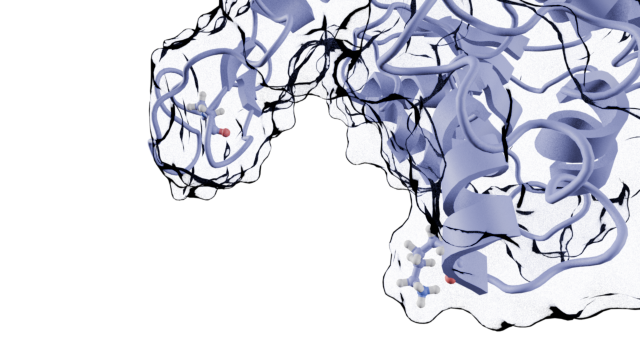

In [10]:
residue_mol.render(engine="EEVEE")

Each molecule has a unique camera view pointing to the center of the molecule. There is also a global camera view. You can render different camera views by calling `render` with different molecules.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmph2ahxeya.PNG
Fra:60 Mem:87.57M (Peak 122.85M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms
Fra:60 Mem:87.62M (Peak 122.85M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms.002
Fra:60 Mem:88.60M (Peak 122.85M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms.001
Fra:60 Mem:94.96M (Peak 122.85M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:60 Mem:86.62M (Peak 122.85M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading forest_cave_1k.hdr
Fra:60 Mem:79.79M (Peak 122.85M) | Time:00:00.58 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Waiting for render to start
Fra:60 Mem:79.79M (Peak 122.85M) | Time:00:00.58 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:60 Mem:79.79M (

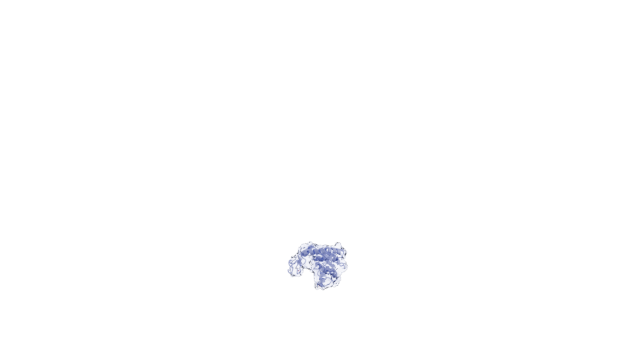

In [11]:
ggmv.global_camera.render()

Alternatively, GGMolVis also provides a `visualize` method to `AtomGroup`.

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmp70voxe27.PNG
Fra:60 Mem:88.30M (Peak 123.44M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms.001
Fra:60 Mem:88.30M (Peak 123.44M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms.003
Fra:60 Mem:95.69M (Peak 123.44M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:60 Mem:87.34M (Peak 123.44M) | Time:00:00.57 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading forest_cave_1k.hdr
Fra:60 Mem:80.34M (Peak 123.44M) | Time:00:00.57 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Waiting for render to start
Fra:60 Mem:80.35M (Peak 123.44M) | Time:00:00.57 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Loading render kernels (may take a few minutes the first time)
Fra:60 Mem:80.35M (Peak 123.44M) | Time:00:00.57 | Mem:8.00M, Peak:8.00M | Scene, ViewLayer | Updating Scene
Fra:60 Mem:80.35M (Peak 123.44M) 

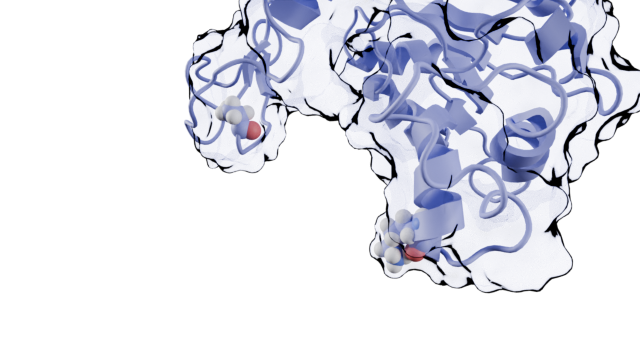

In [12]:
residues_ag.visualize()

## Geometric feature Visualization

Visualize simple geometric features, e.g. distance can be done by calling the `distance` method.

In [13]:
res_1 = residues_ag.residues[0].atoms
res_2 = residues_ag.residues[1].atoms
line = ggmv.distance(res_1, res_2, location=(5,0,0))

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpphjzqgyu.PNG
Fra:60 Mem:132.60M (Peak 139.47M) | Time:00:00.65 | Rendering 1 / 64 samples
Fra:60 Mem:132.69M (Peak 139.47M) | Time:00:00.78 | Rendering 25 / 64 samples
Fra:60 Mem:132.63M (Peak 139.47M) | Time:00:00.85 | Rendering 50 / 64 samples
Fra:60 Mem:132.63M (Peak 139.47M) | Time:00:00.89 | Rendering 64 / 64 samples
Saved: '/var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpphjzqgyu.PNG'
Time: 00:00.91 (Saving: 00:00.01)



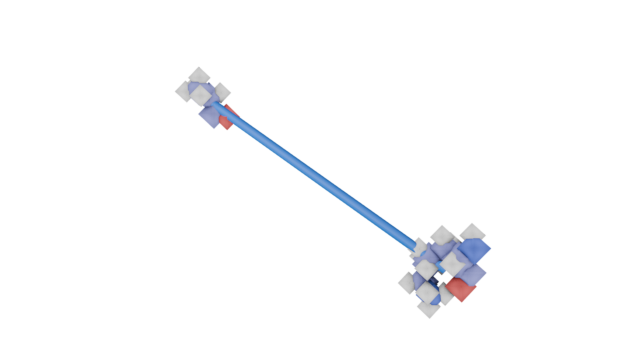

In [14]:
line.render(engine="EEVEE")

## Analysis Visualization

In [15]:
rmsd = RMSD(u.select_atoms('name CA'))
rmsd.run()

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmpwgiqrqoa.PNG
Fra:60 Mem:97.52M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms
Fra:60 Mem:97.56M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | atoms.003
Fra:60 Mem:98.61M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | distance_atoms
Fra:60 Mem:98.63M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | distance_distance
Fra:60 Mem:100.54M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | rmsd
Fra:60 Mem:106.51M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:60 Mem:96.30M (Peak 132.10M) | Time:00:00.58 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Updating Images | Loading forest_cave_1k.hdr
Fra:60 Mem:88.83M (Peak 132.10M) |

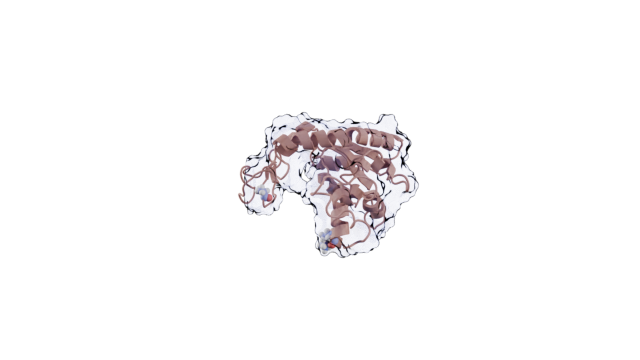

In [16]:
vis = rmsd.visualize()

In [17]:
vis.render(mode='movie', engine="EEVEE", samples=8)

Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmph5fmj3ga.FFMPEG
Rendering to: /var/folders/r4/ym_ncgbd3qddtxqvrmhps8q80000gn/T/tmph5fmj3ga.FFMPEG
Fra:1 Mem:141.84M (Peak 448.31M) | Time:00:00.64 | Rendering 1 / 8 samples
Fra:1 Mem:141.78M (Peak 448.31M) | Time:00:00.69 | Rendering 8 / 8 samples
Append frame 1
Time: 00:00.70 (Saving: 00:00.00)

Fra:2 Mem:141.87M (Peak 448.31M) | Time:00:00.33 | Rendering 1 / 8 samples
Fra:2 Mem:141.87M (Peak 448.31M) | Time:00:00.38 | Rendering 8 / 8 samples
Append frame 2
Time: 00:00.39 (Saving: 00:00.00)

Fra:3 Mem:142.05M (Peak 448.31M) | Time:00:00.33 | Rendering 1 / 8 samples
Fra:3 Mem:142.05M (Peak 448.31M) | Time:00:00.38 | Rendering 8 / 8 samples
Append frame 3
Time: 00:00.39 (Saving: 00:00.00)

Fra:4 Mem:142.02M (Peak 448.31M) | Time:00:00.32 | Rendering 1 / 8 samples
Fra:4 Mem:142.02M (Peak 448.31M) | Time:00:00.36 | Rendering 8 / 8 samples
Append frame 4
Time: 00:00.37 (Saving: 00:00.00)

Fra:5 Mem:142.13M (Peak 448.31M) | T

Error in bpy.app.handlers.frame_change_post[0]:


IndexError: Index 98 exceeds length of trajectory (98).

Fra:98 Mem:142.25M (Peak 448.31M) | Time:00:00.48 | Rendering 1 / 8 samples
Fra:98 Mem:142.25M (Peak 448.31M) | Time:00:00.52 | Rendering 8 / 8 samples
Append frame 98
Time: 00:00.53 (Saving: 00:00.00)



ValueError: To embed videos, you must pass embed=True (this may make your notebook files huge)
Consider passing Video(url='...')